# Laboratorium przetwarzania obrazów i grafiki komputerowej

## Sesja 4 - Filtry liniowe i nieliniowe. Morfologia matematyczna. Szumy.

### Łódź 2017

#### Marek Kociński

### Zadania do wykonania

#### 1. Dane do pracy podczas laboratrium

Ze [strony domowej przedmiotu](http://www.eletel.p.lodz.pl/med/pl/index.php?option=com_jotloader&view=categories&cid=99_b3c1de9aa6c8258566cc1b3370d1e750&Itemid=346) pobierz plik *lab4.zip*. Pobrany plik zapisz **w swoim katalogu roboczym** na dysku *D:\ *, a następnie rozpakuj. Użyj programu *7zip* lub polecenia systemowego *Wyodrębnij wszystkie...*.

#### 2. Importowanie bibliotek systemowych

Zaimportuj wszystkie pakiety systemowe, które będą wykorzystywane podczas wykonywania ćwiczenia.

In [1]:
import os
import numpy as np
import scipy.misc as misc
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

#### 3. Wybór metody wyświetlania obrazów

Podczas wykonywania ćwiczenia sugerowana jest wyświetlanie wyników **w oknach zewnętrznych**.

In [2]:
# wyświetlanie w osobnym, niezależnym oknie
#%matplotlib qt
# wyświetlanie wewnątrz dokumentu
%matplotlib inline

# ustawiamy mape kolorów na "gray"
plt.gray()

#### 4. Importowanie bibliotek własnych

Jeżeli korzystasz z własnych modułów lub pakietów również trzeba ja dołączyć.

Do ponownego zaimportowania modułu nie wystarczy ponowne użycie słowa kluczowego *import* wraz z nazwą modułu. Trzeba "wymusić" ponowne załadowanie klas, funkcji, zmiennych zdefionowanych w utworzonej wcześniej bibliotece za pomocą runkcji *reload()*.

Uwaga! Moduły *poigk_lab1.py*, *poigk_lab2.py*, *poigk_lab3.py* i *poigk_lab4.py* zostały napisane przez prowadzącego zajęcia i nie są dostępne na komputerach studenckich. W trackie zajęć można zapisać tworzone funkcje we własnych modułach w celu ich późniejszego, wielokrotnego wykorzystania. Nie należy importować ww. pakietów podczas pracy na laboratoriach.

In [3]:
import poigk_lab1 as poigk1
import poigk_lab2 as poigk2
import poigk_lab3 as poigk3
import poigk_lab4 as poigk4

#### 5.Biblioteki do przetwarzania obrazów

Istnieje kilka bibliotek które dostarczają wiele gotowych do wykorzystania funkcji do przetwarzania i analizy obrazu:
1. [scipy.ndimage](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html)
1. [scikit-image](http://scikit-image.org/)
1. [OpenCV](http://opencv.org/) 
1. ITK [[1](https://itk.org/),[2](http://www.insight-journal.org)], Simple-ITK [[1](http://www.simpleitk.org/),[2](https://itk.org/Wiki/SimpleITK/GettingStarted)]
1. [Python Imaging Library - (PIL)](http://www.pythonware.com/products/pil/)

Sposób przekazywania argumentów i wywoływaniu funkcji może różnić się pomiędzy bibliotekami, zwróć na to uwagę. Zapoznaj się z przykładami wykorzystnia poszczególnych bibliotek; często na stronach domowych dostępne są "galerie" z przykładami.

#### 6. Filtracja w dziedzinie obrazu

Zapoznaj się z zasadami filtracji liniowej oraz rodzajami masek wykorzystywanych w przetwarzaniu obrazów 2D [[1](http://eletel.p.lodz.pl/pstrumil/ang_po/filtering.pdf), [2](http://eletel.p.lodz.pl/pstrumil/po/filtracja.pdf), [3](https://www.researchgate.net/publication/256079247_Wstep_do_komputerowej_analizy_obrazow), [4](http://winntbg.bg.agh.edu.pl/skrypty2/0098/index.php), [5](http://aragorn.pb.bialystok.pl/~boldak/)] i maskami wykorzystywanymi w celu wykrywania krawędzi [[1](http://eletel.p.lodz.pl/pstrumil/ang_po/edge_detection.pdf), [2](http://eletel.p.lodz.pl/pstrumil/po/kontury.pdf), [3](http://winntbg.bg.agh.edu.pl/skrypty2/0098/index.php)]. Znajdź w literaturze maski do przeprowadzenia filtracji różnego typu i do wykrywania krawędzi wymienione w tabeli poniżej:

|              filtry (F1)    |    F2  |            F3         |     F4          | F5                  | F6              |
|:---------------------------:|:------:|:---------------------:|:---------------:|:-------------------:|:---------------:|
|dolnoprzepustowy uśredniający|Prewitta|dolnoprzepustowy Gaussa|wart. najmniejsza|wykrywanie krawędzi  |wystrzenie obrazu|
|      górnoprzepustowy       |Sobela  |   medianowy           |wart. największa |wykrywanie narożników|Laplacea         |



#### 7. Filtracja z użyciem programu ImageJ-Fiji

Do programu *ImageJ-FIji* wczytaj dowolny obraz z katalogu *lab5_dane* (np. *spaceneedle_gray.png*). Przetestuj kilka algorytmów filtracji, zasosuj maski o różnych wartościach poszczególnych elementów (o ile to możliwe).
1. Process -> Smooth, Sharpen, Find Edges, Find Maxima, ...
1. Process -> Filters -> wszystkie opcje dla obrazów 2D.

#### 8. Biblioteka scipy.ndimage 

Wczytaj jeden z obrazów dostępnych w katalogu z danymi (np. *zagrzeb_gray.png*). W tym celu użyj funkcji *imread()* z biblioteki *matplotlib.pyplot*. Zachowaj kopie obrazu wczytanego (oryginalnego) w zmiennej *img_wczyt*.

Wypisz podstawowe informacje o obrazie.

In [4]:
filename = 'zagrzeb_gray'
filenameext = filename + '.png'
pathtofile = os.path.join('lab4_dane',filenameext)
im = plt.imread(pathtofile)
im_wczyt = im.copy()

In [5]:
poigk2.imginfo2(im, 'Josip Jelacic')

info o JOSIP JELACIC: min=0.03, max=1.00, br.=0.566, con.=0.337 shape=(425L, 640L), dtype=float32


Zastosuj kilka wybranych funkcji z biblioteki *scipy.ndimage* w odniesieniu do wczytanego obrazu, np:
1. sobel,
1. prewitt,
1. minimum_filter,
1. maximum_filter,
1. laplace,
1. gaussian_filter,
1. gaussian_laplace,
1. gaussian_gradient_magnitude,
1. median_filter,
1. convolve (z kilkoma wybranymi maskami, w tym z maską filtru uśreniającego).    

In [6]:
# obrazy po filtracji
sobel = ndimage.sobel(im)
prewitt = ndimage.prewitt(im)
gauss = ndimage.gaussian_filter(im,1)
gauss_laplace = ndimage.gaussian_laplace(im,1)
gauss_gr_mag = ndimage.gaussian_gradient_magnitude(im,1)
laplace = ndimage.laplace(im)

maska_filtru = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
conv = ndimage.convolve(im,maska_filtru,mode='constant')

Wyświetl wyniki obok siebie, zinterpretuj obrazy wynikowe.

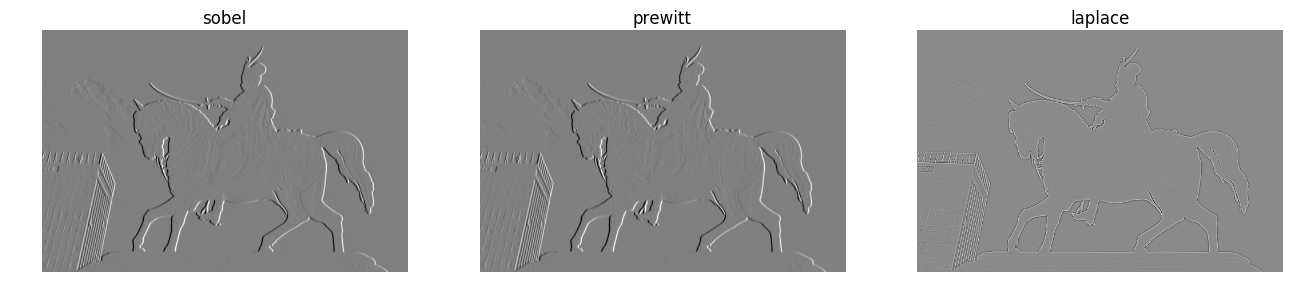

In [7]:
poigk1.imshow3([sobel,prewitt,laplace],show_axis='off',titles=['sobel','prewitt','laplace'])

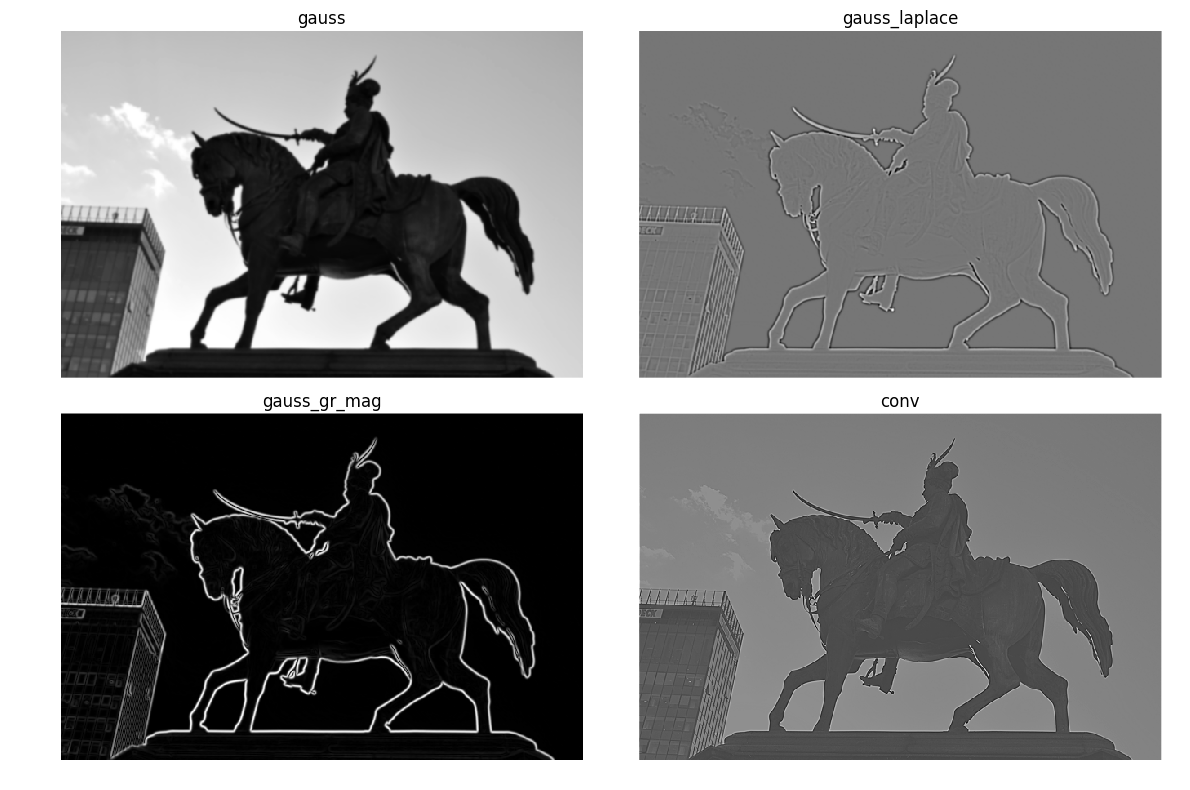

In [8]:
poigk1.imshow4([gauss,gauss_laplace,gauss_gr_mag,conv],show_axis='off',
                                               titles= ['gauss','gauss_laplace','gauss_gr_mag','conv'])

#### 9. Wykorzystanie obrazu jako maski

Wczytaj dowolny obraz z katalogu z danymi np. *lisc_gray.png* z użyciem funkcji *plt.imread()*.


Zastosuj funkcję *gaussian_gradient_magnitude()* z pakietu *ndimage*.


Wypisz podstawowe informacje o obrazach.


Dokonaj progowania obrzu gradientowego z małą wartością progu np. *th=0.01*. Do tego celu zasosuj funkcję *np.where()*. Wartości obrazu większe od *th* zapisz jako *True*, natomiast mniejsze niż *th* zamień na *False*. Rezultat zachowaj w zmiennej *thresh*.


Zastosuj obraz *thresh* jako maskę aby wyświetlić wyznaczone krawędzie jako składową czerwoną; jak na obrazie poniżej. Wyświetl wszystkie wszystkie 3 obrazy.

In [9]:
filename = 'lisc_gray'
filenameext = filename + '.png'
pathtofile = os.path.join('lab4_dane',filenameext)
im = plt.imread(pathtofile)
gauss_gr_mag = ndimage.gaussian_gradient_magnitude(im,1)

In [10]:
poigk2.imginfo2(im,'wczytany')
poigk2.imginfo2(gauss_gr_mag,'gradientowy')

info o WCZYTANY: min=0.11, max=1.00, br.=0.429, con.=0.266 shape=(426L, 640L), dtype=float32
info o GRADIENTOWY: min=0.00, max=0.24, br.=0.009, con.=0.018 shape=(426L, 640L), dtype=float32


In [11]:
thresh = np.where(gauss_gr_mag>0.01,True,False)

In [12]:
r,c = thresh.shape
n = np.zeros((r,c,3))

r = im.copy()
g = im.copy()
b = im.copy()

# obraz thresh jako maska
# zapisany w składowej "r"
r[thresh]=1.0

n[...,0] = r
n[...,1] = g
n[...,2] = b

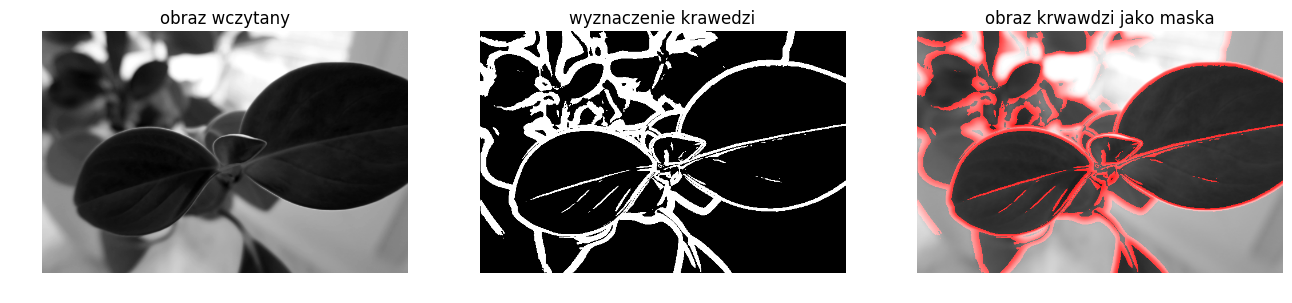

In [13]:
poigk1.imshow3([im,thresh,n],show_axis='off',
               titles=['obraz wczytany','wyznaczenie krawedzi','obraz krwawdzi jako maska'])

#### 10. Morfologia matematyczna

Zapoznaj się z podstawami teoretycznymi morfologi matematyczej, informacje te znajdziesz w podanych źródłach literaturowych np. [[1](http://eletel.p.lodz.pl/pstrumil/ang_po/morphology.pdf),[2](http://winntbg.bg.agh.edu.pl/skrypty2/0098/index.php)].

#### 11. Program ImageJ-Fiji

Do programu *ImageJ-FIji* wczytaj dowolny obraz z katalogu *lab5_dane* (np. *pilki4_gray.png*). 

Zamień obraz na obraz binarny za pomocą finkcji Proces-> Binary -> Make Binary

Przetestuj kilka algorytmów  binaryzacji i morfologi matematycznej.

1. Process -> Binary
    1. Erode
    1. Dilate
    1. Open
    1. Close
    1. Outline
    1. Fill Holes
1. Process -> Morphology -> Gray Morphology. Zwróć uwagę na typy dostępnych elementów strukturujących. 

#### 12. Biblioteka scipy.ndimage

Zaimportuj pakied który umożliwi Ci wykonywanie operacji mofrologicznych.

Z katalogu z danymi *lab5_dane* wczytaj obraz *pilki4_gray.png* i wypisz podstawowe informacje o nim.

Wykonaj progowanie z doświadczalnie dobraną wartością progu. 

Obraz po progowaniu zapisz w zmiennej *thresh*.

Wypisz informacje o tym obrazie.

Wyświetl obydwa obrazy.

In [14]:
from scipy.ndimage import morphology as morph

In [15]:
filename = 'pilki4_gray'
filenameext = filename + '.png'
pathtofile = os.path.join('lab4_dane',filenameext)
im = misc.imread(pathtofile)
im_wczyt = im.copy()

In [16]:
poigk2.imginfo2(im,'wczytany')

info o WCZYTANY: min=17.00, max=218.00, br.=130.604, con.=42.905 shape=(328L, 640L), dtype=uint8


In [17]:
# progowanie
im_thresh = np.where(im>144,255,0)
poigk2.imginfo2(im_thresh, 'sprogowany')

info o SPROGOWANY: min=0.00, max=255.00, br.=109.516, con.=126.225 shape=(328L, 640L), dtype=int32


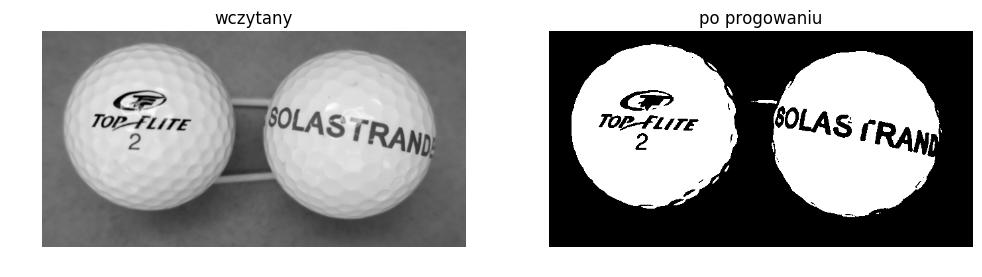

In [18]:
# wizualizacja obrazow
poigk1.imshow2([im_wczyt, im_thresh],titles=['wczytany','po progowaniu'],show_axis='off')

Wykonaj wybrane operacje morfologiczne. W tym celu przygotuj element strukurujący. Możesz wykorzystać funkcję *generate_binary_stucture()* lub zbudować macierz o dowolnym "kształcie".

Sprawdź wygląd elementu strukturującego w zależności od parametrów *rank* i *connectivity*.


Wykonaj operacje morfologii matematycznej dla obrazu binarnego:
1. erozję,
1. dylatację,
1. morfologiczne otwieranie,
1. morfologiczne zamykanie,
1. wypełnianie dziur,
1. powtórz operacje dylatacji i erozji dwa razy. Jaki wpływ na obrazy wynikowe mają te operacje? Zwróć uwagę na niechciany "element łączący" obie piłeczki. Jak się zmieniają napisy w przypadku obu filtracji?

UWAGA 1: Sprawdź wartości i typ obrazów wynikowych (po filtracji).

UWAGA 2: Zwróć uwagę, że część dostępnych funkcji w pakiecie *scipy.ndimage.morphology* może operować na obrazach w skali szarości.

In [19]:
# element strukturujący
se1 = morph.generate_binary_structure(rank=2, connectivity=1)
se2 = morph.generate_binary_structure(rank=2, connectivity=2)

In [20]:
er = morph.binary_erosion(im_thresh, se2)
dil = morph.binary_dilation(im_thresh,se2)
op = morph.binary_opening(im_thresh,se2)
cl = morph.binary_closing(im_thresh,se2)
fill = morph.binary_fill_holes(im_thresh,se2)

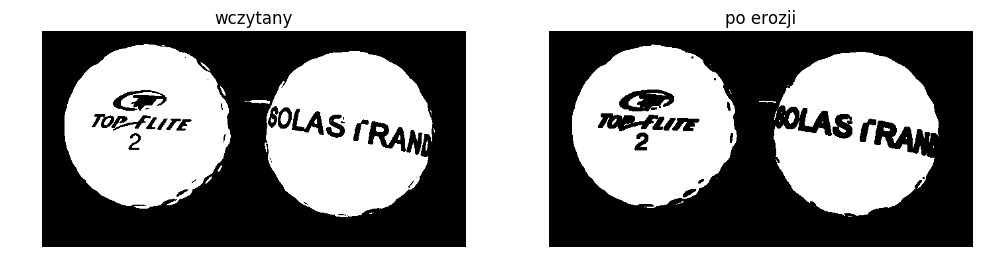

In [21]:
poigk1.imshow2([im_thresh,er],show_axis='off',titles=['wczytany','po erozji'])

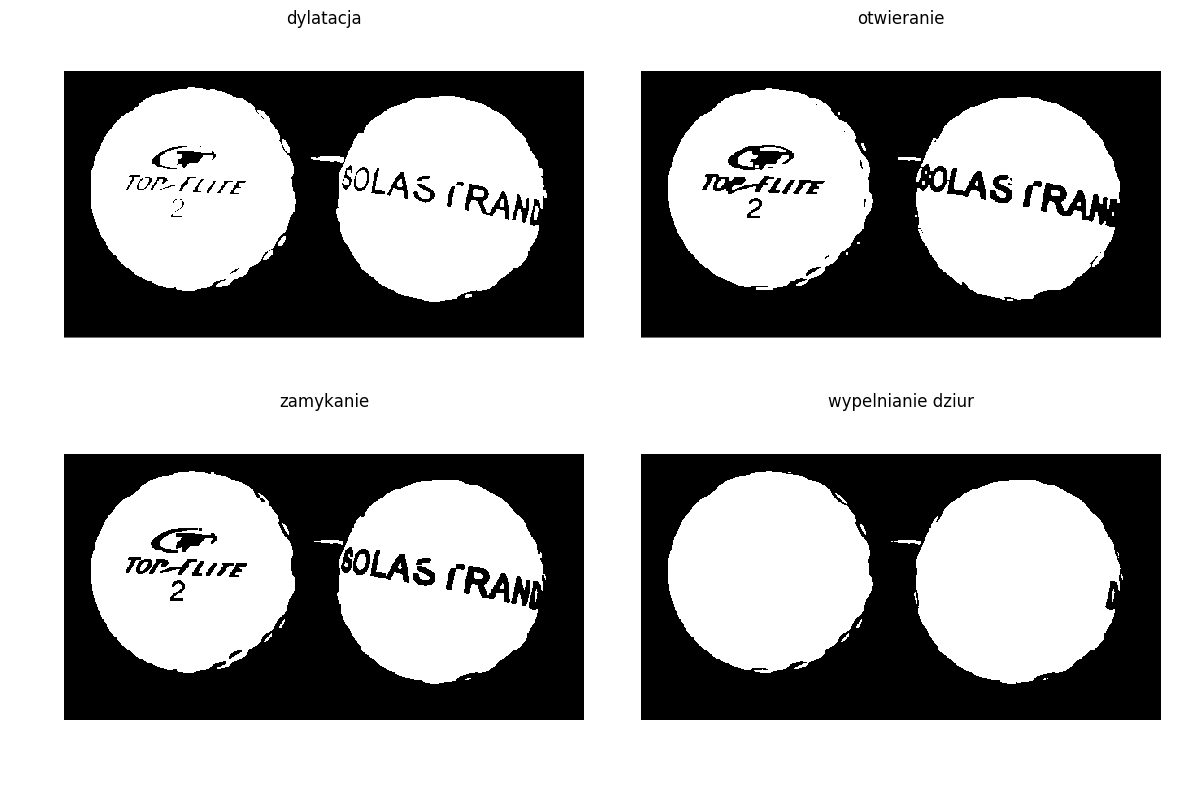

In [22]:
poigk1.imshow4([dil,op,cl,fill],show_axis='off',titles=['dylatacja','otwieranie','zamykanie','wypelnianie dziur'])

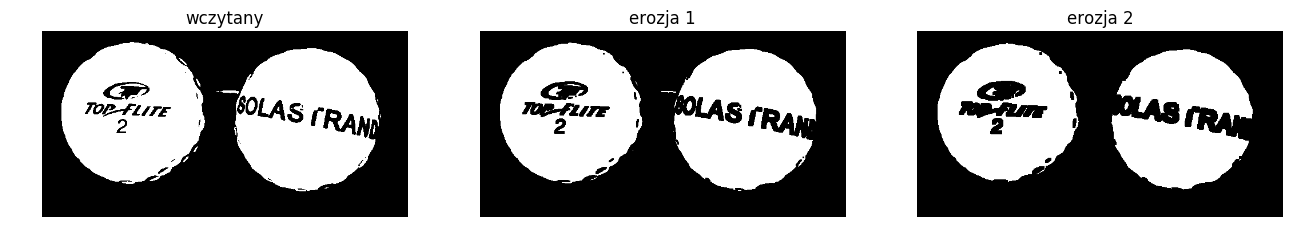

In [23]:
# Erozja przeprowadzona dwa razy z rzędu
er1 = morph.binary_erosion(im_thresh,se2)
er2 = morph.binary_erosion(er1,se2)
poigk1.imshow3([im_thresh,er1,er2],show_axis='off', titles=['wczytany','erozja 1', 'erozja 2'])

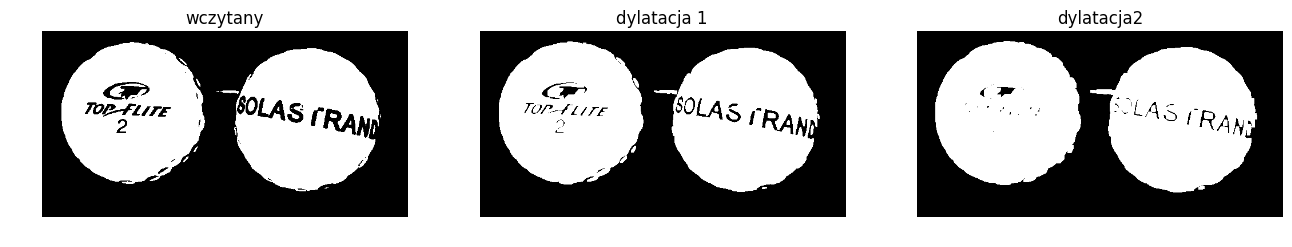

In [24]:
# Dylatacja przeprowadzona dwa razy z rzędu
dil1 = morph.binary_dilation(im_thresh,se2)
dil2 = morph.binary_dilation(dil1,se2)
poigk1.imshow3([im_thresh,dil1,dil2],show_axis='off', titles=['wczytany','dylatacja 1', 'dylatacja2'])

#### 13. Wyznaczanie obwodu obiektu

Zastanów się jak wyznaczyc obwód obiektów korzystając tylko z operacji morfologicznych? Jaki jest efetk dylatacji obrazu binarnego? Jaki jest rezultat erozji obrazu binarnego? Jak wykorzystać te operacje do celu wyznaczenia szkieletu?

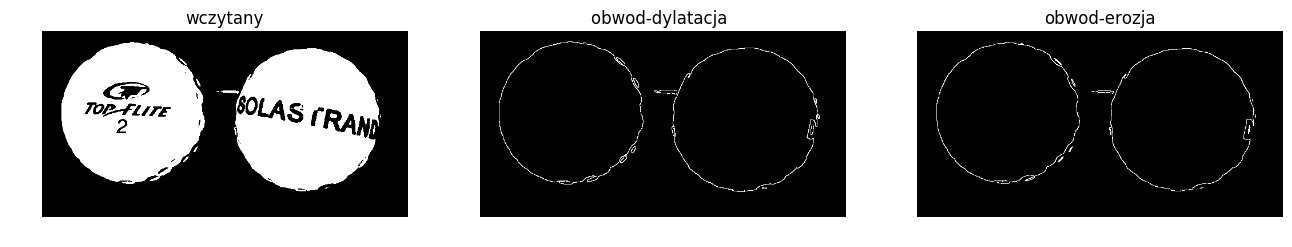

In [25]:
obw_dil =  morph.binary_dilation(fill,se2)*1 - fill*1
obw_er =  fill*1 - morph.binary_erosion(fill,se2)*1
poigk1.imshow3([im_thresh,obw_dil,obw_er],show_axis='off', titles=['wczytany','obwod-dylatacja ', 'obwod-erozja'])

#### 14. Eliminacja zniekształceń poprzez sumowanie obrazów

Zapoznaj się z zaganieniem eliminacji zniekształceń [[1](http://eletel.p.lodz.pl/pstrumil/po/poprawa%20jakosci%201.pdf), [2](http://eletel.p.lodz.pl/pstrumil/ang_po/enhancement1.pdf), [3](http://eletel.p.lodz.pl/pstrumil/ang_po/filtering.pdf)] poprzez sumowanie obrazów. Metoda ta może być stosowane do poprawy jakości obrazu zakłóconego addytywnym szumem Gaussa. Algorytm polega na wielokrotnym obrazowaniu tego samego obiektu, a następnie sumowaniu wszystkich obrazów. Ponieważ nie dysponujemy obrazem zakłóconym, zatem do wczytanego obrazu kilkukrotnie dodamy szum o rozkładzie Gaussa (wartość średnia $ \mu=0 $).

Z katalogu z danymi *lab5_dane* wczytaj obraz *pilka_gray.png* i wypisz parametry obrazu.

Dodaj wczytanego obrazu dodaj 10 razy szum gaussowski o wartości średniej $\mu=0$ i wybranej wartości odchylenia standardoweg. Parametr sigma, w tym przypadku, jest okraślony jak odpowiedni procent wartości maksymalnej obrazu.

Procedurę powtórz dla wszysckich wartości $\sigma$ ze zbioru $\sigma=\{20,30,40,50\}\%$  

In [26]:
filename = 'pilka_gray'
filenameext = filename + '.png'
pathtofile = os.path.join('lab4_dane',filenameext)
im = misc.imread(pathtofile)
im_wczyt = im.copy()

In [27]:
poigk2.imginfo2(im, 'pilka')

info o PILKA: min=9.00, max=180.00, br.=117.517, con.=57.514 shape=(418L, 640L), dtype=uint8


In [28]:
# wyliczenie wartości sigma
sigma =  30*im.max()/100.0
print sigma

54.0


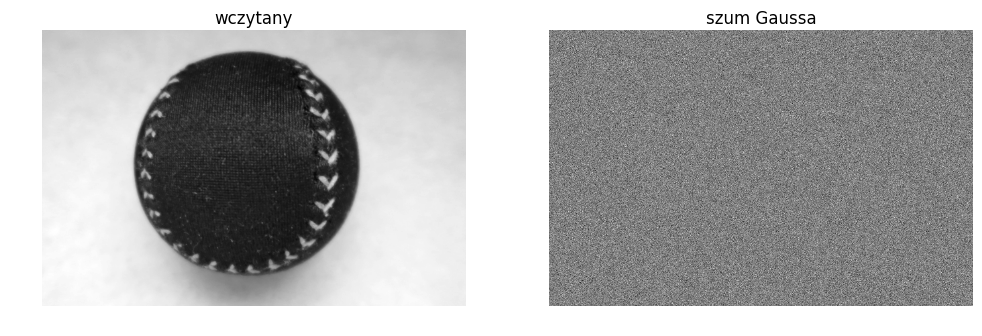

info o WCZYTANY: min=9.00, max=180.00, br.=117.517, con.=57.514 shape=(418L, 640L), dtype=uint8
info o GAUSS: min=-4.69, max=4.67, br.=-0.001, con.=0.999 shape=(418L, 640L), dtype=float64


In [29]:
# wygenerowanie szumu Gaussa o zadanych parametrach
gauss = np.random.randn(*im.shape)
poigk1.imshow2([im,gauss],show_axis='off',titles=['wczytany','szum Gaussa'])
poigk2.imginfo2(im,'wczytany')
poigk2.imginfo2(gauss,'Gauss')

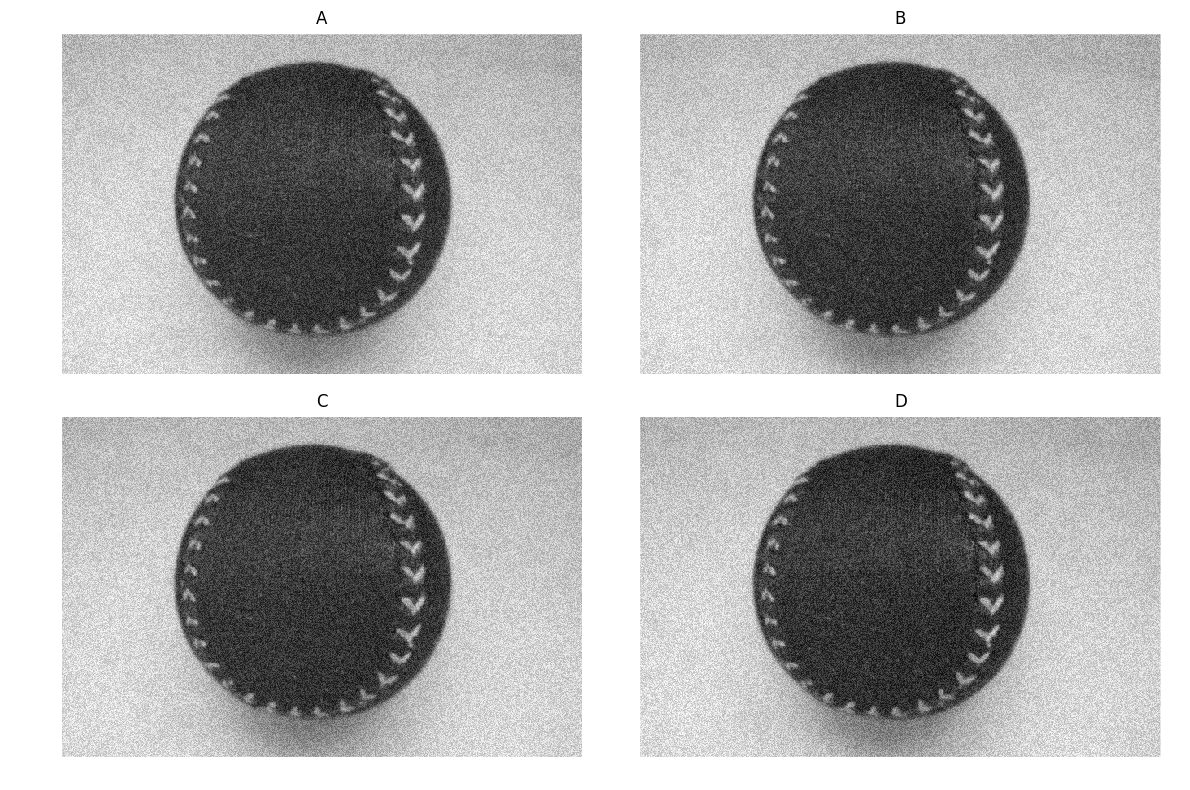

info o OBRAZEK: min=10.23, max=232.93, br.=144.539, con.=59.573 shape=(418L, 640L), dtype=float64
info o OBRAZEK: min=13.24, max=231.84, br.=144.541, con.=59.575 shape=(418L, 640L), dtype=float64
info o OBRAZEK: min=12.95, max=233.87, br.=144.522, con.=59.510 shape=(418L, 640L), dtype=float64
info o OBRAZEK: min=17.42, max=232.41, br.=144.481, con.=59.618 shape=(418L, 640L), dtype=float64


In [30]:
# dodanie szumu do obrazów zadaną liczbę razy
# obrazy zakłócone zachowamy liście

k = 10
obrazy = []
for i in range(k):
    obrazy.append(im+np.random.rand(*im.shape)*sigma)
    
# wyswietlenie wybranych 4 obrazow
wybrane = [obrazy[2],obrazy[4],obrazy[6],obrazy[8]]
poigk1.imshow4(wybrane,show_axis='off')    

# wypisanie podstawowych informacji o wybranych obrazach
a=[poigk2.imginfo2(obr) for obr in wybrane]


Dokonaj sumowania 4,6,8 i 10 obrazów. Wyświetl wyniki.

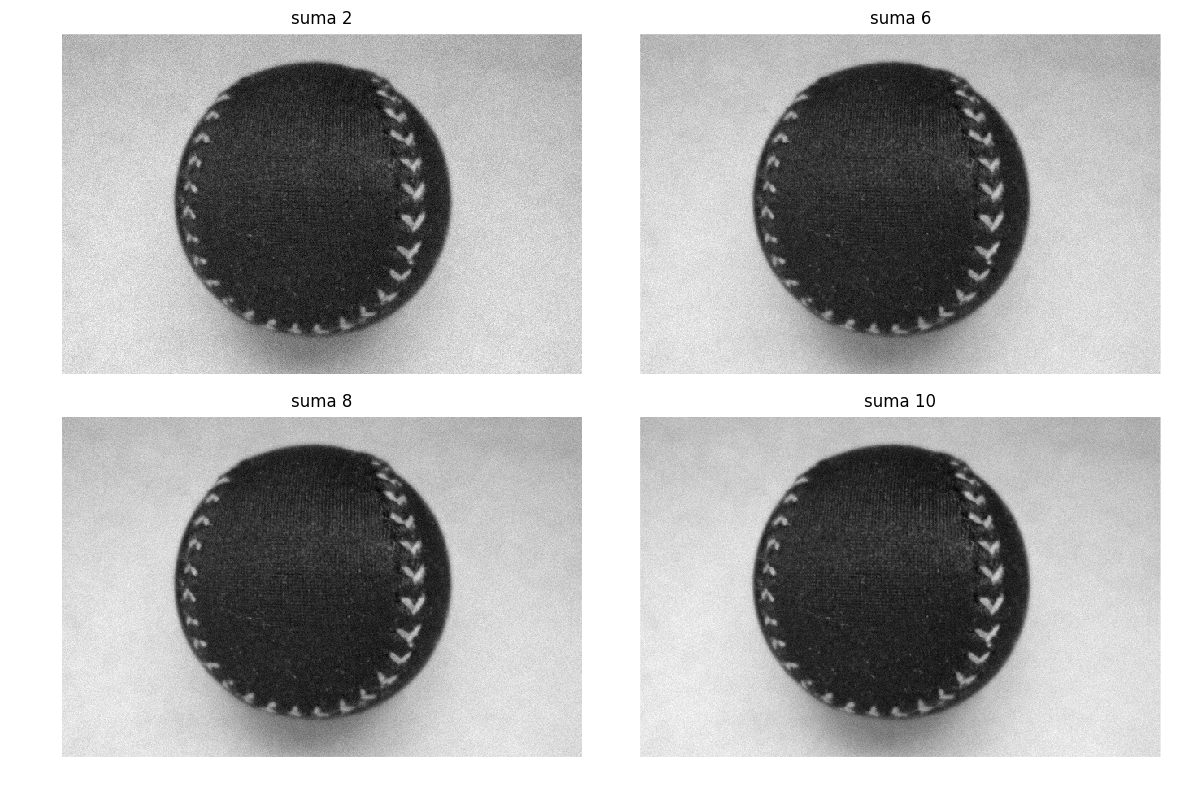

info o SUMA 4: min=25.62, max=228.23, br.=144.534, con.=58.040 shape=(418L, 640L), dtype=float64
info o SUMA 6: min=28.05, max=225.86, br.=144.535, con.=57.864 shape=(418L, 640L), dtype=float64
info o SUMA 8: min=29.38, max=222.95, br.=144.533, con.=57.765 shape=(418L, 640L), dtype=float64
info o SUMA 10: min=31.48, max=219.36, br.=144.533, con.=57.719 shape=(418L, 640L), dtype=float64


In [31]:
obrazy4 = (obrazy[0] + obrazy[1] + obrazy[2] + obrazy[3])/4
obrazy6 = (obrazy[0] + obrazy[1] + obrazy[2] + obrazy[3] + obrazy[4] + obrazy[5])/6
obrazy8 = (obrazy[0] + obrazy[1] + obrazy[2] + obrazy[3] + obrazy[4] + obrazy[5] + obrazy[6] + obrazy[7])/8
obrazy10 = (obrazy[0] + obrazy[1] + obrazy[2] + obrazy[3] + obrazy[4] + obrazy[5] + obrazy[6]
            + obrazy[7] + obrazy[8] + obrazy[9])/10

poigk1.imshow4([obrazy4,obrazy6,obrazy8,obrazy10], show_axis='off',titles=['suma 2', 'suma 6', 'suma 8', 'suma 10'])
poigk2.imginfo2(obrazy4, 'suma 4')
poigk2.imginfo2(obrazy6, 'suma 6')
poigk2.imginfo2(obrazy8, 'suma 8')
poigk2.imginfo2(obrazy10, 'suma 10')

###  15. Szum typu "pieprz i sól"

Zapooznaj się z krótką infomracją dotyczącą szumu typu "pieprz i sól" [[1](http://eletel.p.lodz.pl/pstrumil/ang_po/filtering.pdf)]. Napisz funkcję która dodaje taki szum do obrazu, o wartościach minimalnej i maksymalnej jasności w obrazie. 

Ponownie wczytaj obraz *seattle5_gray.png*, dodaj szum do niego i wyswietl obydwa obrazy.

Spróbuj "usunąć" szum za pomocą filtru Gaussa i filtru medianowego.

Porównaj wyniki. Zwróć uwagę na krawędzie w obrazie. Dlaczego filtry dają różne wyniki? Jak działają obydwa filtry? Który z filtrów jest "lepszy" do pozbycia się szumu typu *pieprz i sól*?

In [32]:
filename = 'seattle5_gray'
filenameext = filename + '.png'
pathtofile = os.path.join('lab4_dane',filenameext)
im = misc.imread(pathtofile)
im_wczyt = im.copy()

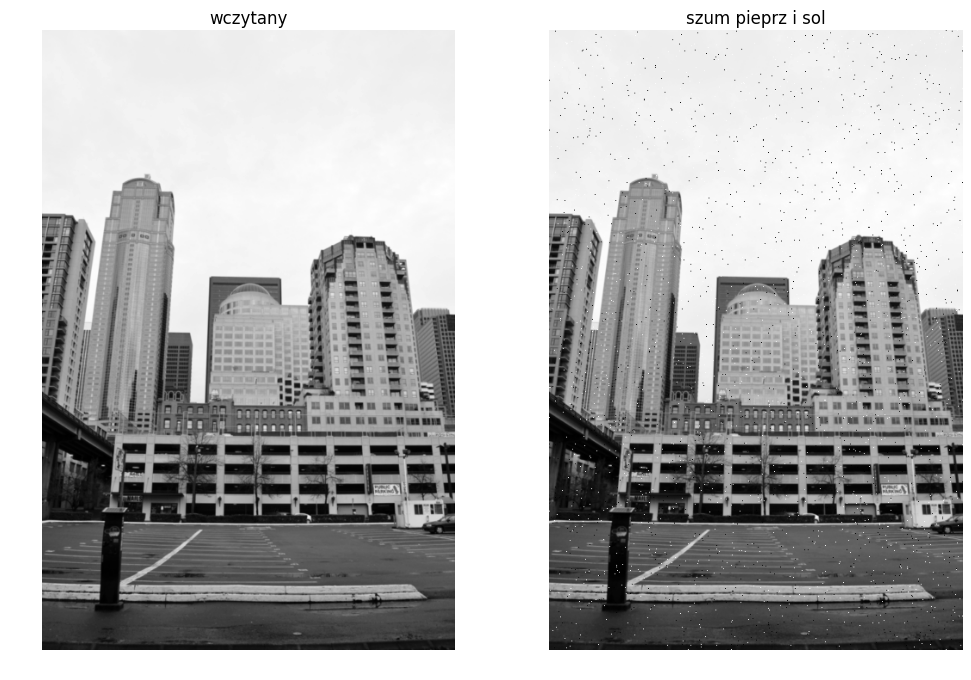

In [33]:
pieprzsol= poigk4.saltandpepper(im)
poigk1.imshow2([im,pieprzsol],titles=['wczytany','szum pieprz i sol'],show_axis='off')

In [34]:
poigk2.imginfo2(im,'wczytany')
poigk2.imginfo2(pieprzsol,'pieprz i sol')

info o WCZYTANY: min=2.00, max=239.00, br.=146.597, con.=74.286 shape=(722L, 480L), dtype=uint8
info o PIEPRZ I SOL: min=2.00, max=239.00, br.=146.430, con.=74.742 shape=(722L, 480L), dtype=uint8


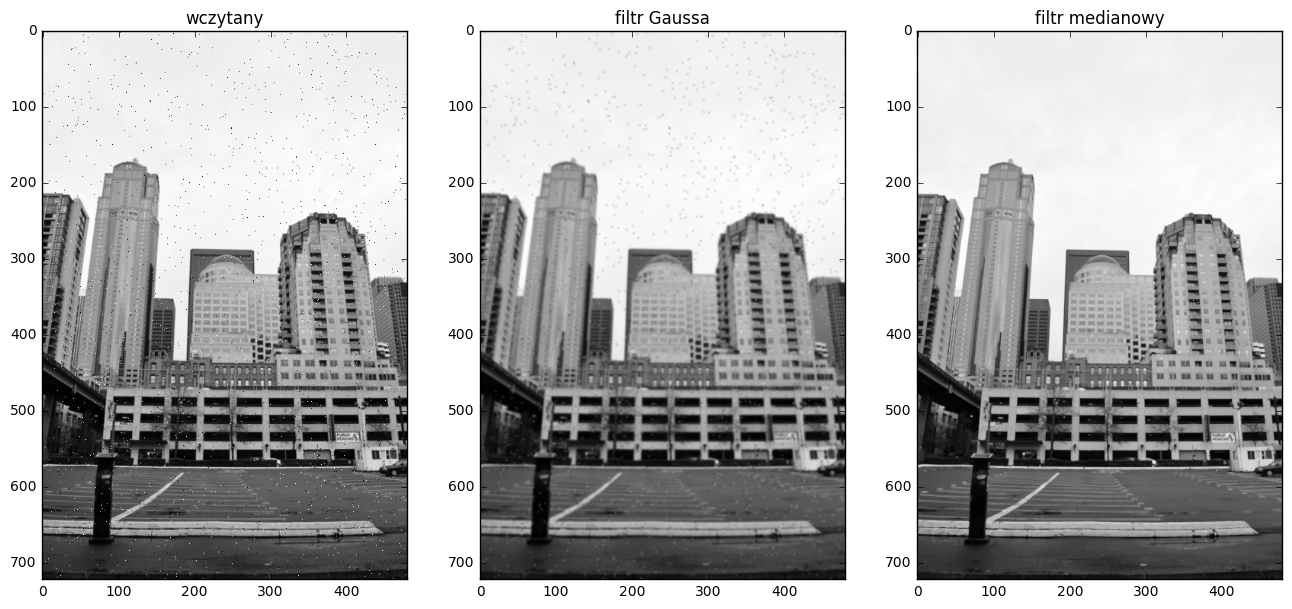

In [35]:
gauss = ndimage.gaussian_filter(pieprzsol,1)
median = ndimage.median_filter(pieprzsol,2)
poigk1.imshow3([pieprzsol,gauss,median,],titles=['wczytany','filtr Gaussa', 'filtr medianowy'],titles_axis='off')

#### 16. Obiektywne porównanie wpływu filtracji.

W celu obiektywnego określenia wpływu filtracji stosuje się różne miary błędów, np.: 
1. Błąd średniokwadratowy (*Mean Squared error*, *[MSE](https://en.wikipedia.org/wiki/Mean_squared_error)*)
$$MSE = \frac {\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}(L(x,y)-L^{'}(x,y))^2 }{MN}$$

1. Szczytowy stosunek sygnału do szumu (*Peak Signal To Noise Ratio*, *[PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)*)
$$PSNR=10 log_{10} (\frac{MAX^{2}}{MSE} ) $$

gdzie:

$L(x,y)$ - obraz oryginalny

$L^{"}(x,y)$ - obraz po filtracji

$MAX$ - największa **możliwa** jasność obrazu, czyli dla obrazu typu *uint8* jest to 255

Napisz funkcje które obliczają obydwie miary błędów pomiędzy dwoma obrazami.

Przefiltruj obraz *seattle5_gray.png* i *pilka_gray.png*, a następnie porównaj obydwie miary dla wszystkich czterech przypadków.

In [36]:
im1 = misc.imread(os.path.join('lab4_dane','seattle5_gray.png'))
im2 = misc.imread(os.path.join('lab4_dane','pilka_gray.png'))

In [37]:
poigk2.imginfo2(im1,'widok')
poigk2.imginfo2(im2, 'pilka')

info o WIDOK: min=2.00, max=239.00, br.=146.597, con.=74.286 shape=(722L, 480L), dtype=uint8
info o PILKA: min=9.00, max=180.00, br.=117.517, con.=57.514 shape=(418L, 640L), dtype=uint8


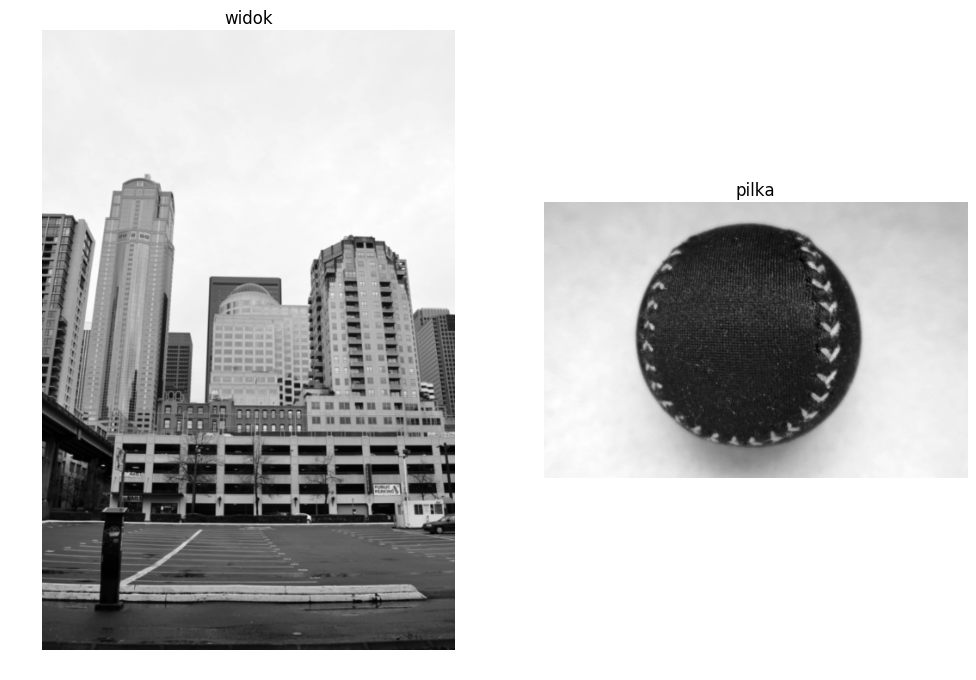

In [38]:
poigk1.imshow2([im1,im2],titles=['widok','pilka'],show_axis='off')

In [39]:
# filtracja obrazow
im1_gauss = ndimage.gaussian_filter(im1,1)
im2_gauss = ndimage.gaussian_filter(im2,1)
im1_median = ndimage.median_filter(im1,2)
im2_median = ndimage.median_filter(im2,2)

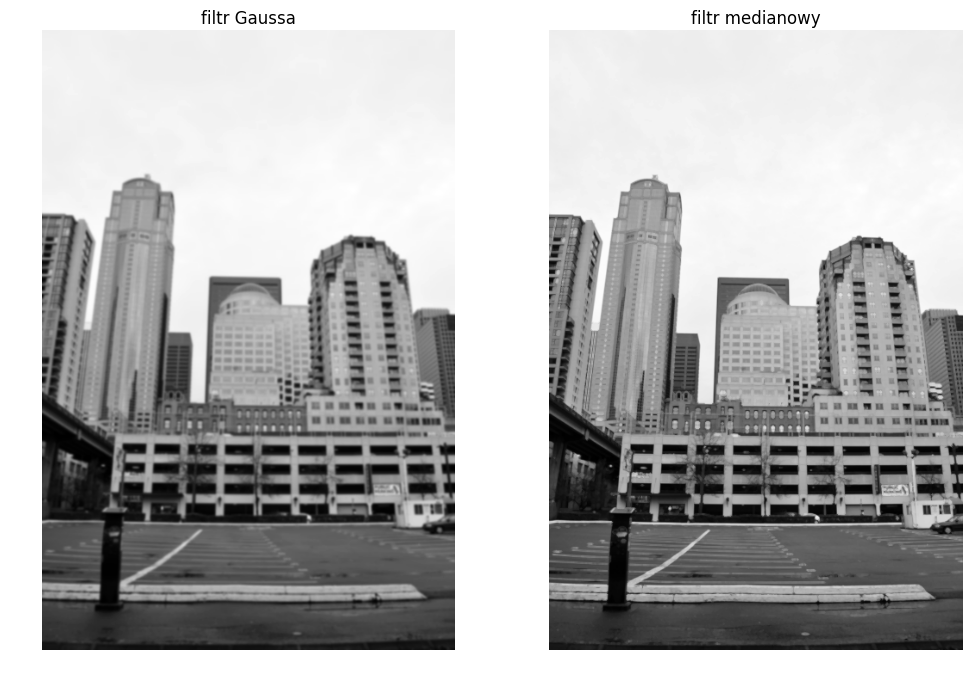

In [40]:
poigk1.imshow2([im1_gauss,im1_median],titles=['filtr Gaussa','filtr medianowy'],show_axis='off')

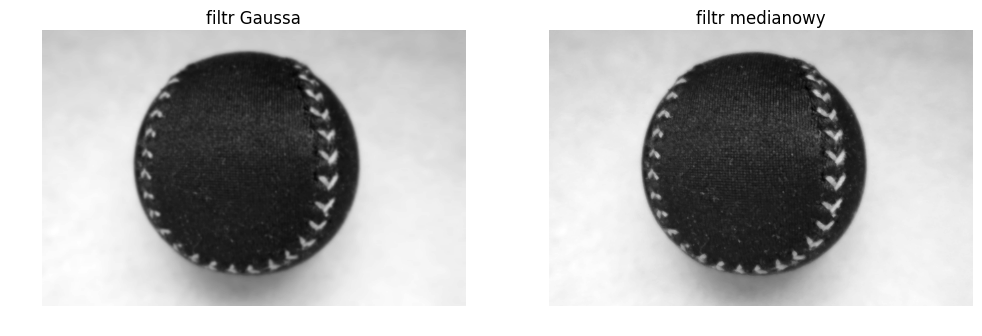

In [41]:
poigk1.imshow2([im2_gauss,im2_median],titles=['filtr Gaussa','filtr medianowy'],show_axis='off')

In [42]:
print "Obraz: seattle vs. seattle (filtr Gaussa):\tmse = {:.2f}".format(poigk4.mse(im1, im1_gauss))
print "Obraz: seattle vs. seattle (filtr medianowy):\tmse = {:.2f}".format(poigk4.mse(im1, im1_median))
print "Obraz: seattle vs. seattle (filtr Gaussa):\tpsnr = {:.2f}".format(poigk4.psnr(im1, im1_gauss))
print "Obraz: seattle vs. seattle (filtr medianowy):\tpsnr = {:.2f}".format(poigk4.psnr(im1, im1_median))
print 
print "Obraz: pilka vs. pilka (filtr Gaussa):\t\tmse = {:.2f}".format(poigk4.mse(im2, im2_gauss))
print "Obraz: pilka vs. pilka (filtr medianowy):\tmse = {:.2f}".format(poigk4.mse(im2, im2_median))
print "Obraz: pilka vs. pilka (filtr Gaussa):\t\tpsnr = {:.2f}".format(poigk4.psnr(im2, im2_gauss))
print "Obraz: pilka vs. pilka (filtr medianowy):\tpsnr ={:.2f}".format(poigk4.psnr(im2, im2_median))

Obraz: seattle vs. seattle (filtr Gaussa):	mse = 25.00
Obraz: seattle vs. seattle (filtr medianowy):	mse = 19.00
Obraz: seattle vs. seattle (filtr Gaussa):	psnr = 34.15
Obraz: seattle vs. seattle (filtr medianowy):	psnr = 35.34

Obraz: pilka vs. pilka (filtr Gaussa):		mse = 4.00
Obraz: pilka vs. pilka (filtr medianowy):	mse = 5.00
Obraz: pilka vs. pilka (filtr Gaussa):		psnr = 42.11
Obraz: pilka vs. pilka (filtr medianowy):	psnr =41.14


Zastanów się dlaczego wartości mse dla obu obrazów różnią się znacząco? Co na to ma wpływ? Przecież zastosowaliśmy w obydwu przypadkach takie same filtry.

#### 17. Zadania do wykonania podczas zajęć lub w domu

1. Zapoznaj się ze sposobami filtracji obrazów 2D w dziedzinie częstotliwości. W tym celu wykorzystaj program *Fiji*, a w drugim etapie dowolną bibliotekę np. *scipy.ndimage*.
1. Napisz funkcję które realizuje filtrację obrazu z maską filtru o rozmiarze 3x3, funkcja ma wykorzystywać dwie pętle *for* (Uwaga! Funcja będzie działać wolno).
1. Zastanów się jak zrealizowć filtrację obraz 2D z wykorzystaniem procedury nazywanej *wycinaniem* (ang. *slicing*).

#### Ostatnia aktualizacja: 11.04.2017 r.